## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Possible questions

Does area income effect price of houses

Does grade have an effect on housing price

Does property size effect housing price

Does Age of property effect price

In [272]:
#find lat and long of city center then subtract out lat and long form it to find the difference 
# weak correlation to test in model Floor waterfront view and grade 

In [371]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn import metrics
from scipy import stats
import math
from PIL import Image

In [316]:
df = pd.read_csv("data/kc_house_data_clean.csv")
df =df.drop(["Unnamed: 0"], axis = 1)

In [317]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,205425.0,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,236000.0,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,170000.0,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2720000.0,4,3.25,3990,18115,2.0,0,4,2,1,3990,0.0,1989,0.0,24,47.6177,-122.229,3450,16087,7190.0,33,2014,3,0
21416,1950000.0,4,3.50,4065,18713,2.0,0,4,2,0,4065,0.0,1987,0.0,24,47.6209,-122.237,3070,18713,7190.0,35,2014,2,0
21417,2250000.0,5,5.25,3410,8118,2.0,0,4,0,1,3410,0.0,2006,0.0,24,47.6295,-122.236,3410,16236,7190.0,16,2015,1,0
21418,2900000.0,5,4.00,5190,14600,2.0,0,2,0,1,5190,0.0,2013,0.0,24,47.6102,-122.225,3840,19250,7190.0,9,2014,3,0


Initial Model

In [318]:
initial_corr = df.corr().sort_values(by="price", ascending=False)

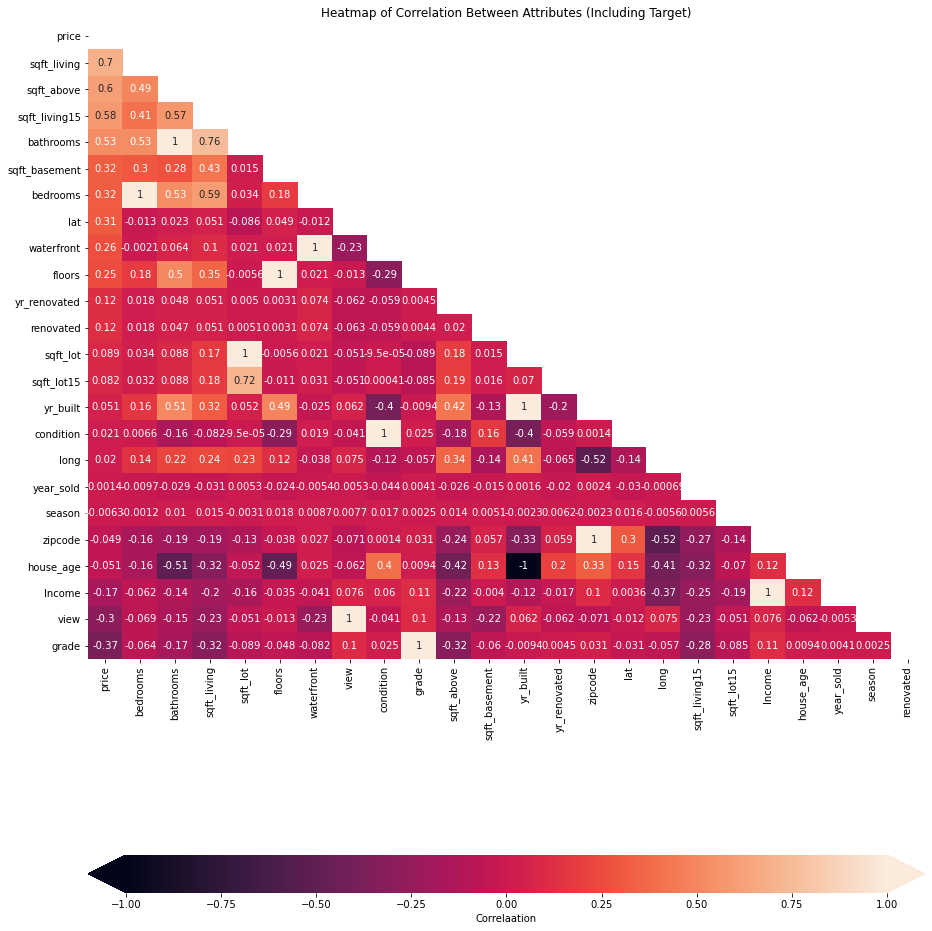

In [319]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(data = initial_corr, mask = np.triu(np.ones_like(initial_corr, dtype=bool)), ax = ax, annot = True, cbar_kws = {"label": "Correlaation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

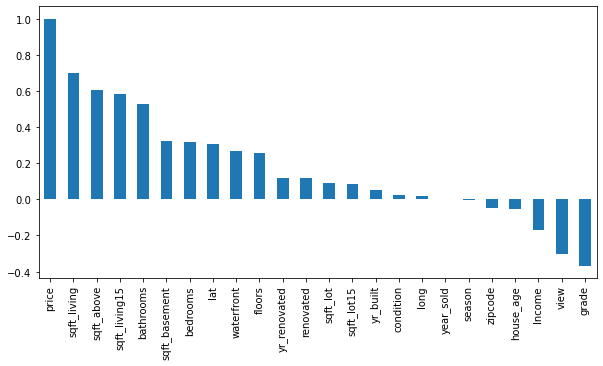

In [320]:
initial_corr['price'].sort_values(ascending = False).plot.bar(figsize=(10,5))
plt.show()

In [321]:
corr = df.corr()
abs(corr > .7)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Possibly drop

br : sqft liv

sqft liv 15 : sqft liv

sqft above : sqft liv

sqft lot 15 : sqft lot



Keep sqft_living, drop sqft_above, sqft_living15 due to high collinearity 

Keep sqft_lot drop sqft_lot15

df = df.drop(["sqft_above", "sqft_living15", "sqft_lot15", "lat", "long" ], axis=1)

In [322]:
corr = df.corr()
abs(corr > .7)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [323]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Income           float64
house_age          int64
year_sold          int64
season             int64
renovated          int64
dtype: object

Although the above table shows that there is a high collinearity between bedrooms and sqft_living, we believe that the number of bedrooms will play a key role in the price of the home, will revisit after modeling to verify if we need

In [324]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,205425.0,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,236000.0,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,170000.0,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2720000.0,4,3.25,3990,18115,2.0,0,4,2,1,3990,0.0,1989,0.0,24,47.6177,-122.229,3450,16087,7190.0,33,2014,3,0
21416,1950000.0,4,3.50,4065,18713,2.0,0,4,2,0,4065,0.0,1987,0.0,24,47.6209,-122.237,3070,18713,7190.0,35,2014,2,0
21417,2250000.0,5,5.25,3410,8118,2.0,0,4,0,1,3410,0.0,2006,0.0,24,47.6295,-122.236,3410,16236,7190.0,16,2015,1,0
21418,2900000.0,5,4.00,5190,14600,2.0,0,2,0,1,5190,0.0,2013,0.0,24,47.6102,-122.225,3840,19250,7190.0,9,2014,3,0


In [325]:
X = df.drop("price", axis=1)
y= df["price"]

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV,min_features_to_select=5 ,cv=splitter)
selector.fit(X_train, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")
####updated # of features

In [327]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17136, 23)
(4284, 23)
(17136,)
(4284,)


In [328]:
X_train = df.drop("price", axis=1)
y_train = df["price"]

X_test = df.drop("price", axis=1)
y_test = df["price"]

X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,4,3.25,3990,18115,2.0,0,4,2,1,3990,0.0,1989,0.0,24,47.6177,-122.229,3450,16087,7190.0,33,2014,3,0
21416,4,3.50,4065,18713,2.0,0,4,2,0,4065,0.0,1987,0.0,24,47.6209,-122.237,3070,18713,7190.0,35,2014,2,0
21417,5,5.25,3410,8118,2.0,0,4,0,1,3410,0.0,2006,0.0,24,47.6295,-122.236,3410,16236,7190.0,16,2015,1,0
21418,5,4.00,5190,14600,2.0,0,2,0,1,5190,0.0,2013,0.0,24,47.6102,-122.225,3840,19250,7190.0,9,2014,3,0


In [329]:
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[["sqft_living"]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.48968535742377295
Validation score: 0.49653373354233493


In [330]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Income           float64
house_age          int64
year_sold          int64
season             int64
renovated          int64
dtype: object

In [331]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Income', 'house_age', 'year_sold',
       'season', 'renovated'],
      dtype='object')

In [332]:
df_numerical = df[['price', 'bedrooms','bathrooms', 'sqft_living', 'floors', 'sqft_lot', 'sqft_basement', 'sqft_living15', 'sqft_lot15','Income',]].copy()

In [333]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]
vif["features"] = df_numerical.columns
vif.round(2)

,VIF Factor,features
0,6.60,price
1,18.72,bedrooms
2,24.59,bathrooms
3,33.17,sqft_living
4,13.75,floors
5,2.35,sqft_lot
6,2.40,sqft_basement
7,19.79,sqft_living15
8,2.57,sqft_lot15
9,5.63,Income


Checking Data

In [334]:
y = df["price"]
X = df.drop("price", axis=1)

In [335]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Income', 'house_age', 'year_sold',
       'season', 'renovated'],
      dtype='object')

In [336]:
pd.set_option('display.max_columns', None)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,4,3.25,3990,18115,2.0,0,4,2,1,3990,0.0,1989,0.0,24,47.6177,-122.229,3450,16087,7190.0,33,2014,3,0
21416,4,3.50,4065,18713,2.0,0,4,2,0,4065,0.0,1987,0.0,24,47.6209,-122.237,3070,18713,7190.0,35,2014,2,0
21417,5,5.25,3410,8118,2.0,0,4,0,1,3410,0.0,2006,0.0,24,47.6295,-122.236,3410,16236,7190.0,16,2015,1,0
21418,5,4.00,5190,14600,2.0,0,2,0,1,5190,0.0,2013,0.0,24,47.6102,-122.225,3840,19250,7190.0,9,2014,3,0


In [337]:
y

0         221900.0
1         205425.0
2         445000.0
3         236000.0
4         170000.0
           ...    
21415    2720000.0
21416    1950000.0
21417    2250000.0
21418    2900000.0
21419    1870000.0
Name: price, Length: 21420, dtype: float64

In [338]:
model = sm.OLS(y, sm.add_constant(X), missing = "drop").fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     2117.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:02:57   Log-Likelihood:            -2.9251e+05
No. Observations:               21420   AIC:                         5.851e+05
Df Residuals:                   21397   BIC:                         5.852e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -69.2842      4.541    -15.257

In [339]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21420, 23)
(21420, 23)
(21420,)
(21420,)


In [340]:
data_transformation = preprocessing.StandardScaler()
data = data_transformation.fit_transform(X_train)
data

array([[-0.41257996, -1.45495786, -0.98296196, ..., -0.69429479,
         1.42849868, -0.18916492],
       [-1.52003144, -1.45495786, -1.30947943, ..., -0.69429479,
        -0.5038921 , -0.18916492],
       [-0.41257996,  0.1711599 ,  0.0183583 , ..., -0.69429479,
         0.46230329, -0.18916492],
       ...,
       [ 1.80232299,  4.07384254,  1.44415128, ...,  1.4403104 ,
        -0.5038921 , -0.18916492],
       [ 1.80232299,  2.44772478,  3.3814883 , ..., -0.69429479,
         1.42849868, -0.18916492],
       [ 0.69487152,  2.12250122,  1.85774008, ...,  1.4403104 ,
        -1.47008748, -0.18916492]])

In [342]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,205425.0,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,236000.0,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,170000.0,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2720000.0,4,3.25,3990,18115,2.0,0,4,2,1,3990,0.0,1989,0.0,24,47.6177,-122.229,3450,16087,7190.0,33,2014,3,0
21416,1950000.0,4,3.50,4065,18713,2.0,0,4,2,0,4065,0.0,1987,0.0,24,47.6209,-122.237,3070,18713,7190.0,35,2014,2,0
21417,2250000.0,5,5.25,3410,8118,2.0,0,4,0,1,3410,0.0,2006,0.0,24,47.6295,-122.236,3410,16236,7190.0,16,2015,1,0
21418,2900000.0,5,4.00,5190,14600,2.0,0,2,0,1,5190,0.0,2013,0.0,24,47.6102,-122.225,3840,19250,7190.0,9,2014,3,0


In [343]:
df2 = df.to_numpy()

In [344]:
y1 = df2[:, 0]
y1

array([ 221900.,  205425.,  445000., ..., 2250000., 2900000., 1870000.])

In [345]:
X1 = df2[:,1:]
X1

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 2.014e+03, 3.000e+00,
        0.000e+00],
       [2.000e+00, 1.000e+00, 8.800e+02, ..., 2.014e+03, 1.000e+00,
        0.000e+00],
       [3.000e+00, 2.250e+00, 2.100e+03, ..., 2.014e+03, 2.000e+00,
        0.000e+00],
       ...,
       [5.000e+00, 5.250e+00, 3.410e+03, ..., 2.015e+03, 1.000e+00,
        0.000e+00],
       [5.000e+00, 4.000e+00, 5.190e+03, ..., 2.014e+03, 3.000e+00,
        0.000e+00],
       [4.000e+00, 3.750e+00, 3.790e+03, ..., 2.015e+03, 0.000e+00,
        0.000e+00]])

In [346]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [347]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(17136, 23)
(4284, 23)
(17136,)
(4284,)


In [348]:
data_transformation = preprocessing.StandardScaler()
data = data_transformation.fit_transform(X_train1)

In [368]:
model = LinearRegression().fit(data, y_train1)
print(model.intercept_)
print(model.coef_)

543071.2926004977
[  -42356.56800406    45322.22937036   142182.08662029     3616.24526958
    19475.08679572    57478.41303805   -27944.54876168    21812.82678695
   -44747.45367041    59029.83616029    19129.1337642    -27287.22727651
  1688380.62314374   -38358.40959526    94117.4920913    -51022.91011271
    42263.77966809   -12609.39829189   -22534.55292632    27287.22727651
    15522.65021374     3864.28715916 -1674709.5196107 ]


In [357]:
accuracy = model.score(data, y_train1)
accuracy

0.6877809252590406

In [358]:
test_accuracy = model.score(data_transformation.transform((X_test1)), y_test1)
test_accuracy

0.6722761250554701

In [359]:
y_pred = model.predict(data_transformation.transform(X_test1))

In [360]:
y_pred

array([472499.69184523, 446820.35440406, 487883.08315226, ...,
       325643.89832322, 356966.73162098, 464080.71945247])

In [372]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

Mean Absolute Error: 130462.02300234168
Mean Squared Error: 41027049814.25112
Root Mean Squared Error: 202551.35105511177


In [373]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

ValueError: array length 4284 does not match index length 21420

In [362]:
rmse_total = (sum((y_test - model.predict(X_test))**2)/len(y_test))**.5
rmse_total

3145375298.4115505